# A Blending Problem

## Problem Description

Whiskas cat food, shown above, is manufactured by Uncle Ben’s. Uncle Ben’s want to produce their cat food products as cheaply as possible while ensuring they meet the stated nutritional analysis requirements shown on the cans. Thus they want to vary the quantities of each ingredient used (the main ingredients being chicken, beef, mutton, rice, wheat and gel) while still meeting their nutritional standards.

The costs of the chicken, beef, and mutton are \\$0.013, \\$0.008 and \\$0.010 respectively, while the costs of the rice, wheat and gel are \\$0.002, \\$0.005 and \\$0.001 respectively. (All costs are per gram.) For this exercise we will ignore the vitamin and mineral ingredients. (Any costs for these are likely to be very small anyway.)


Each ingredient contributes to the total weight of protein, fat, fibre and salt in the final product. The contributions (in grams) per gram of ingredient are given in the table below.

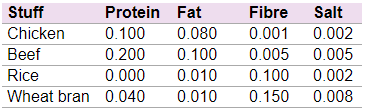

## Simplified Formulation

First we will consider a simplified problem to build a simple Python model.

### Identify the Decision Variables

Assume Whiskas want to make their cat food out of just two ingredients: Chicken and Beef. We will first define our decision variables:

$$x_1 = percentage\ of\ chicken\ meat\ in\ a\ can\ of\ cat\ food$$
$$x_2 = percentage\ of\ beef\ used\ in\ a\ can\ of\ cat\ food$$

The limitations on these variables (greater than zero) must be noted but for the Python implementation, they are not entered or listed separately or with the other constraints.

### The Constraints

$$1.000x_1 + 1.000x_2 = 100.0$$
$$0.100x_1 + 0.200x_2 \geq 8.0$$
$$0.080x_1 + 0.100x_2 \geq 6.0$$
$$0.001x_1 + 0.005x_2 \leq 2.0$$
$$0.002x_1 + 0.005x_2 \leq 0.4$$

### Solution to Simplified Problem

To obtain the solution to this Linear Program, we can write a short program in Python to call PuLP’s modelling functions, which will then call a solver. This will explain step-by-step how to write this Python program. It is suggested that you repeat the exercise yourself. The code for this example is found in WhiskasModel1.py

The start of the your file should then be headed with a short commenting section outlining the purpose of the program. For example:

In [1]:
"""
The Simplified Whiskas Model Python Formulation for the PuLP Modeller

Authors: Antony Phillips, Dr Stuart Mitchell  2007
"""

'\nThe Simplified Whiskas Model Python Formulation for the PuLP Modeller\n\nAuthors: Antony Phillips, Dr Stuart Mitchell  2007\n'

Then you will import PuLP’s functions for use in your code:



In [5]:
# Import PuLP modeler functions
from pulp import LpProblem, LpMinimize, LpMaximize, LpVariable

A variable called prob (although its name is not important) is created using the LpProblem function. It has two parameters, the first being the arbitrary name of this problem (as a string), and the second parameter being either LpMinimize or LpMaximize depending on the type of LP you are trying to solve:

In [6]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem("The Whiskas Problem",LpMinimize)

The problem variables x1 and x2 are created using the LpVariable class.  
It has four parameters, 
- the first is the arbitrary name of what this variable represents, 
- the second is the lower bound on this variable, 
- the third is the upper bound, and 
- the fourth is essentially the type of data (discrete or continuous). 

The options for the fourth parameter are LpContinuous or LpInteger, with the default as LpContinuous. If we were modelling the number of cans to produce, we would need to input LpInteger since it is discrete data. The bounds can be entered directly as a number, or None to represent no bound (i.e. positive or negative infinity), with None as the default. If the first few parameters are entered and the rest are ignored (as shown), they take their default values. However, if you wish to specify the third parameter, but you want the second to be the default value, you will need to specifically set the second parameter as it’s default value. i.e you cannot leave a parameter entry blank. e.g:

In [7]:
LpVariable("example", None, 100)

example

or:



In [9]:
type(LpVariable("example", upBound = 100))

pulp.pulp.LpVariable

To explicitly create the two variables needed for this problem:



In [14]:
# The 2 variables Beef and Chicken are created with a lower limit of zero
x1=LpVariable("ChickenPercent",0,None,LpInteger)
x2=LpVariable("BeefPercent",0)

The variable prob now begins collecting problem data with the += operator. The objective function is logically entered first, with an important comma , at the end of the statement and a short string explaining what this objective function is:

In [15]:
# The objective function is added to 'prob' first
prob += 0.013*x1 + 0.008*x2, "Total Cost of Ingredients per can"

The constraints are now entered (Note: any “non-negative” constraints were already included when defining the variables). This is done with the ‘+=’ operator again, since we are adding more data to the prob variable. The constraint is logically entered after this, with a comma at the end of the constraint equation and a brief description of the cause of that constraint:



In [16]:
# The five constraints are entered
prob += x1 + x2 == 100, "PercentagesSum"
prob += 0.100*x1 + 0.200*x2 >= 8.0, "ProteinRequirement"
prob += 0.080*x1 + 0.100*x2 >= 6.0, "FatRequirement"
prob += 0.001*x1 + 0.005*x2 <= 2.0, "FibreRequirement"
prob += 0.002*x1 + 0.005*x2 <= 0.4, "SaltRequirement"

Now that all the problem data is entered, the writeLP() function can be used to copy this information into a .lp file into the directory that your code-block is running from. Once your code runs successfully, you can open this .lp file with a text editor to see what the above steps were doing. You will notice that there is no assignment operator (such as an equals sign) on this line. This is because the function/method called writeLP() is being performed to the variable/object prob (and the string "WhiskasModel.lp" is an additional parameter). The dot . between the variable/object and the function/method is important and is seen frequently in Object Oriented software (such as this):



In [17]:
# The problem data is written to an .lp file
prob.writeLP("WhiskasModel.lp")

The LP is solved using the solver that PuLP chooses. The input brackets after solve() are left empty in this case, however they can be used to specify which solver to use (e.g prob.solve(CPLEX()) ):



In [18]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

Now the results of the solver call can be displayed as output to us. Firstly, we request the status of the solution, which can be one of “Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”. The value of prob (pulp.pulp.LpProblem.status) is returned as an integer, which must be converted to its significant text meaning using the LpStatus dictionary. Since LpStatus is a dictionary(dict), its input must be in square brackets:



In [19]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


The variables and their resolved optimum values can now be printed to the screen.



In [20]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)


BeefPercent = 66.0
ChickenPercent = 34.0


The for loop makes variable cycle through all the problem variable names (in this case just ChickenPercent and BeefPercent). Then it prints each variable name, followed by an equals sign, followed by its optimum value. name and varValue are properties of the object variable.

The optimised objective function value is printed to the screen, using the value function. This ensures that the number is in the right format to be displayed. objective is an attribute of the object prob:

In [21]:
# The optimised objective function value is printed to the screen
print("Total Cost of Ingredients per can = ", value(prob.objective))

Total Cost of Ingredients per can =  0.97


Running this file should then produce the output to show that Chicken will make up 33.33%, Beef will make up 66.67% and the Total cost of ingredients per can is 96 cents.



# Full formulation

Now we will formulate the problem fully with all the variables. Whilst it could be implemented into Python with little addition to our method above, we will look at a better way which does not mix the problem data, and the formulation as much. This will make it easier to change any problem data for other tests. We will start the same way by algebraically defining the problem:

1. Identify the Decision Variables For the Whiskas Cat Food Problem the decision variables are the percentages of the different ingredients we include in the can. Since the can is 100g, these percentages also represent the amount in g of each ingredient included. We must formally define our decision variables, being sure to state the units we are using.

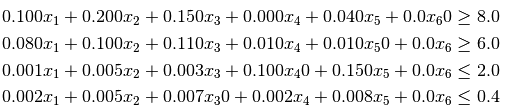

Note that these percentages must be between 0 and 100.

2. Formulate the Objective Function For the Whiskas Cat Food Problem the objective is to minimise the total cost of ingredients per can of cat food. We know the cost per g of each ingredient. We decide the percentage of each ingredient in the can, so we must divide by 100 and multiply by the weight of the can in g. This will give us the weight in g of each ingredient:

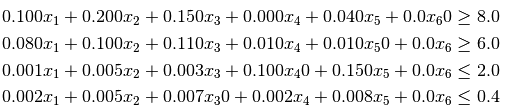

3. Formulate the Constraints The constraints for the Whiskas Cat Food Problem are that:

    - The sum of the percentages must make up the whole can (= 100%).
    - The stated nutritional analysis requirements are met.
The constraint for the “whole can” is:

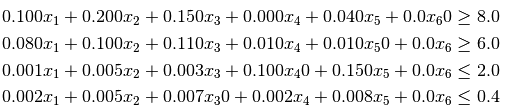

To meet the nutritional analysis requirements, we need to have at least 8g of Protein per 100g, 6g of fat, but no more than 2g of fibre and 0.4g of salt. To formulate these constraints we make use of the previous table of contributions from each ingredient. This allows us to formulate the following constraints on the total contributions of protein, fat, fibre and salt from the ingredients:

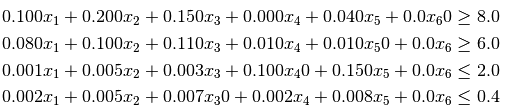

## Solution to Full Problem

To obtain the solution to this Linear Program, we again write a short program in Python to call PuLP’s modelling functions, which will then call a solver. This will explain step-by-step how to write this Python program with it’s improvement to the above model. It is suggested that you repeat the exercise yourself. The code for this example is found in the WhiskasModel2.py

As with last time, it is advisable to head your file with commenting on its purpose, and the author name and date. Importing of the PuLP functions is also done in the same way:



In [10]:
"""
The Full Whiskas Model Python Formulation for the PuLP Modeller

Authors: Antony Phillips, Dr Stuart Mitchell  2007
"""

# Import PuLP modeler functions
from pulp import *

Next, before the prob variable or type of problem are defined, the key problem data is entered into dictionaries. This includes the list of Ingredients, followed by the cost of each Ingredient, and it’s percentage of each of the four nutrients. These values are clearly laid out and could easily be changed by someone with little knowledge of programming. The ingredients are the reference keys, with the numbers as the data.



In [11]:
# Creates a list of the Ingredients
Ingredients = ['CHICKEN', 'BEEF', 'MUTTON', 'RICE', 'WHEAT', 'GEL']

# A dictionary of the costs of each of the Ingredients is created
costs = {'CHICKEN': 0.013, 
         'BEEF': 0.008, 
         'MUTTON': 0.010, 
         'RICE': 0.002, 
         'WHEAT': 0.005, 
         'GEL': 0.001}

# A dictionary of the protein percent in each of the Ingredients is created
proteinPercent = {'CHICKEN': 0.100, 
                  'BEEF': 0.200, 
                  'MUTTON': 0.150, 
                  'RICE': 0.000, 
                  'WHEAT': 0.040, 
                  'GEL': 0.000}

# A dictionary of the fat percent in each of the Ingredients is created
fatPercent = {'CHICKEN': 0.080, 
              'BEEF': 0.100, 
              'MUTTON': 0.110, 
              'RICE': 0.010, 
              'WHEAT': 0.010, 
              'GEL': 0.000}

# A dictionary of the fibre percent in each of the Ingredients is created
fibrePercent = {'CHICKEN': 0.001, 
                'BEEF': 0.005, 
                'MUTTON': 0.003, 
                'RICE': 0.100, 
                'WHEAT': 0.150, 
                'GEL': 0.000}

# A dictionary of the salt percent in each of the Ingredients is created
saltPercent = {'CHICKEN': 0.002, 
               'BEEF': 0.005, 
               'MUTTON': 0.007, 
               'RICE': 0.002, 
               'WHEAT': 0.008, 
               'GEL': 0.000}

The prob variable is created to contain the formulation, and the usual parameters are passed into LpProblem.



In [12]:
# Create the 'prob' variable to contain the problem data
prob = LpProblem("The Whiskas Problem", LpMinimize)

A dictionary called ingredient_vars is created which contains the LP variables, with their defined lower bound of zero. The reference keys to the dictionary are the Ingredient names, and the data is Ingr_IngredientName. (e.g. MUTTON: Ingr_MUTTON)

In [13]:
# A dictionary called 'ingredient_vars' is created to contain the referenced Variables
ingredient_vars = LpVariable.dicts("Ingr",Ingredients,0)

Since costs and ingredient_vars are now dictionaries with the reference keys as the Ingredient names, the data can be simply extracted with a list comprehension as shown. The lpSum() function will add the elements of the resulting list. Thus the objective function is simply entered and assigned a name:

In [14]:
# The objective function is added to 'prob' first
prob += lpSum([costs[i]*ingredient_vars[i] for i in Ingredients]), "Total Cost of Ingredients per can"

Further list comprehensions are used to define the other 5 constraints, which are also each given names describing them.

In [15]:
# The five constraints are added to 'prob'
prob += lpSum([ingredient_vars[i] for i in Ingredients]) == 100, "PercentagesSum"
prob += lpSum([proteinPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 8.0, "ProteinRequirement"
prob += lpSum([fatPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 6.0, "FatRequirement"
prob += lpSum([fibrePercent[i] * ingredient_vars[i] for i in Ingredients]) <= 2.0, "FibreRequirement"
prob += lpSum([saltPercent[i] * ingredient_vars[i] for i in Ingredients]) <= 0.4, "SaltRequirement"

Following this, the writeLP line etc follow exactly the same as in the simplified example.

The optimal solution is 60% Beef and 40% Gel leading to a objective Function value of 52 cents per can.

In [16]:
# The problem data is written to an .lp file
prob.writeLP("WhiskasModelFull.lp")

The LP is solved using the solver that PuLP chooses. The input brackets after solve() are left empty in this case, however they can be used to specify which solver to use (e.g prob.solve(CPLEX()) ):



In [33]:
# The problem is solved using PuLP's choice of Solver
prob.solve()

1

Now the results of the solver call can be displayed as output to us. Firstly, we request the status of the solution, which can be one of “Not Solved”, “Infeasible”, “Unbounded”, “Undefined” or “Optimal”. The value of prob (pulp.pulp.LpProblem.status) is returned as an integer, which must be converted to its significant text meaning using the LpStatus dictionary. Since LpStatus is a dictionary(dict), its input must be in square brackets:



In [34]:
# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

Status: Optimal


The variables and their resolved optimum values can now be printed to the screen.



In [35]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)


Ingr_BEEF = 60.0
Ingr_CHICKEN = 0.0
Ingr_GEL = 40.0
Ingr_MUTTON = 0.0
Ingr_RICE = 0.0
Ingr_WHEAT = 0.0


The for loop makes variable cycle through all the problem variable names (in this case just ChickenPercent and BeefPercent). Then it prints each variable name, followed by an equals sign, followed by its optimum value. name and varValue are properties of the object variable.

The optimised objective function value is printed to the screen, using the value function. This ensures that the number is in the right format to be displayed. objective is an attribute of the object prob:

In [36]:
# The optimised objective function value is printed to the screen
print("Total Cost of Ingredients per can = ", value(prob.objective))

Total Cost of Ingredients per can =  0.52
